In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<AxesSubplot:>

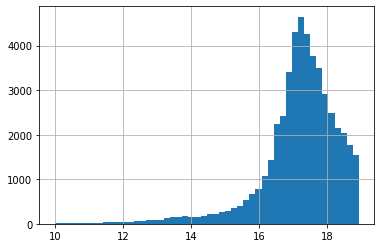

In [2]:
df0 = pd.read_csv('./data/processed/moscow_spb.csv')
df0.per_square_meter_price.hist(bins=50)

In [3]:
realty_type_categories = ['realty_type_10', 'realty_type_100', 'realty_type_110']
points_types = ['amenity_points', 'building_points', 'catering_points', 'crossing_points', 'culture_points',
                'finance_points', 'healthcare_points', 'historic_points', 'hotels_points', 'leisure_points',
                'offices_points', 'shops_points']

columns = ['per_square_meter_price', 'city', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_city_nearest_population'] + realty_type_categories + points_types

df = df0[columns]

def f(it):
       if it.osm_city_closest_dist < it.osm_subway_closest_dist:
              return 2 * it.osm_subway_closest_dist
       else:
              return it.osm_city_closest_dist
df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)

target_col = 'per_square_meter_price'
columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

df.head(100)

C:\Users\super\AppData\Local\Temp\ipykernel_15376\592342821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)
C:\Users\super\AppData\Local\Temp\ipykernel_15376\592342821.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


,per_square_meter_price,city,osm_city_closest_dist,osm_subway_closest_dist,osm_city_nearest_population,realty_type_10,realty_type_100,realty_type_110,amenity_points,building_points,catering_points,crossing_points,culture_points,finance_points,healthcare_points,historic_points,hotels_points,leisure_points,offices_points,shops_points
0,17.143440,-0.621515,0.060267,-0.259196,-1.313556,0.0,0.0,1.0,-0.369688,0.022215,-0.419500,-0.476218,-0.527752,-0.718367,-0.494602,-0.500636,-0.243012,-0.531850,-0.699086,-0.261847
1,17.140066,1.608970,-0.061503,-0.370535,-0.322607,1.0,0.0,0.0,-0.244903,-0.683785,-0.256237,0.609027,-0.050515,0.021807,0.041167,-0.023418,-0.443851,-0.895211,-0.359318,-0.232254
2,16.644414,1.608970,0.042562,-0.209247,-0.322607,0.0,0.0,1.0,-0.123862,-0.683785,-0.167184,0.002716,-0.408443,-0.787758,0.338817,-0.553660,-0.316044,-0.453986,-0.404621,0.056281
3,17.283452,-0.621515,0.756577,-0.255507,1.037040,1.0,0.0,0.0,-0.314783,-0.401385,-0.449184,-0.608689,-0.487983,-0.695236,-0.296169,-0.518311,-0.334302,-0.402078,-0.189434,-0.099084
4,16.709324,-0.621515,-0.845642,-0.353403,1.037040,0.0,1.0,0.0,1.145200,0.234015,1.736315,1.724842,1.082924,3.051896,2.025497,0.135655,0.615117,0.117011,0.977101,0.768987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18.086394,-0.621515,1.304816,-0.258701,1.037040,0.0,0.0,1.0,-0.352218,0.022215,-0.486289,-0.756446,-0.368673,-0.510193,-0.415228,-0.482961,-0.443851,-0.116579,-0.665109,-0.111414
96,17.252846,1.608970,0.751809,1.262462,-0.322607,0.0,1.0,0.0,-0.588061,-0.683785,-0.460316,-0.297891,-0.527752,-0.741497,-0.732721,-0.500636,-0.443851,-0.843303,-0.517876,-0.449271
97,18.339374,-0.621515,0.870141,-0.226374,1.037040,0.0,1.0,0.0,0.017145,-0.542585,-0.337868,-0.929677,-0.487983,-0.394541,0.199914,-0.253189,-0.389077,2.426954,-0.585830,0.149993
98,17.953295,-0.621515,0.060683,-0.153922,1.037040,0.0,0.0,1.0,-0.256134,-0.471985,-0.467737,0.583552,-0.388558,-0.325149,-0.296169,-0.500636,-0.261270,0.246783,-0.212086,-0.202660


In [4]:
mape_mean = 0
baseline_mean = 0
n = 50
for _ in range(n):
       train, test = train_test_split(df, test_size=0.5)

       baseline = pd.Series([train.per_square_meter_price.mean()] * len(test))

       train_x, train_y = train.drop(target_col, axis=1), train[target_col]
       test_x, test_y = test.drop(target_col, axis=1), test[target_col]



       model = LinearRegression()
       model.fit(train_x, train_y)

       pred = model.predict(test_x)
       mape_mean += mean_absolute_percentage_error(2**test_y, 2**pred)
       baseline_mean += mean_absolute_percentage_error(2 ** test_y, 2 ** baseline)
print(mape_mean / n)
print(baseline_mean / n)

1.124342697122188
1.1817280894450797


### Forecasting

In [5]:
df0 = pd.read_csv('./data/test/moscow_spb.csv')
df0.set_index('Unnamed: 0', inplace=True)
df0.index.name='id'
print(df0.head(100))
print(df0.shape)

     city  floor          id        lat        lng  osm_city_closest_dist  \
id                                                                          
0       0    1.0  COL_164098  55.700000  37.752365               9.188121   
7       0    1.0  COL_205915  55.715042  37.894173               4.085305   
12     11    NaN   COL_49322  59.946625  30.264826               2.995279   
14      0    1.0  COL_230193  55.794365  37.491142              10.944283   
18     11    NaN   COL_18655  59.934578  30.275497               2.316197   
..    ...    ...         ...        ...        ...                    ...   
332     0    NaN  COL_168071  55.654600  37.757000               8.976514   
333     0    1.0  COL_247566  55.793915  37.612316               4.845881   
345     0    1.0  COL_224295  55.714370  37.896930               4.015370   
347    11    NaN   COL_45040  59.981873  30.364054               5.487957   
349     0    1.0  COL_244204  55.617270  37.411472              10.568343   

In [6]:
columns.remove('per_square_meter_price') if 'per_square_meter_price' in columns else ''
df = df0[columns]

df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)

columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

print(df.head(100))
print(df.shape)

         city  osm_city_closest_dist  osm_subway_closest_dist  \
id                                                              
0   -0.572603               0.272583                -0.102444   
7   -0.572603              -0.578321                -0.161945   
12   1.746409              -0.760085                -0.207493   
14  -0.572603               0.565427                -0.377361   
18   1.746409              -0.873323                -0.125324   
..        ...                    ...                      ...   
332 -0.572603               0.237297                -0.211726   
333 -0.572603              -0.451493                -0.344306   
345 -0.572603              -0.589983                -0.208616   
347  1.746409              -0.344426                -0.060018   
349 -0.572603               0.502738                -0.124579   

     osm_city_nearest_population  realty_type_10  realty_type_100  \
id                                                                  
0               

C:\Users\super\AppData\Local\Temp\ipykernel_15376\1178050692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)
C:\Users\super\AppData\Local\Temp\ipykernel_15376\1178050692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


In [7]:
pred = model.predict(df)

res = pd.DataFrame(data=pred, columns=[target_col])
res['id'] = df0.index.tolist()
res.set_index('id', inplace=True)

res.head(100)
res.to_csv('./data/forecast/moscow_spb.csv')